# Explore the Prepared ReasonIR HQ Dataset

## 1. Setup

First, let's install the necessary libraries for our exploration.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_from_disk, load_dataset
import openai
import os
from getpass import getpass
from collections import Counter

sns.set_theme(style="whitegrid")

# Load Separate Splits of the ReasonIR data

In [60]:
from datasets import load_dataset

def get_doc_and_ids(doc_pairs):
    doc_ids = []
    documents = []
    for dp in doc_pairs:
        doc_ids.append(str(dp['id']))
        documents.append(dp['content'])
    return documents, doc_ids
    
def process_pos_id2doc(entry, id2doc):
    pos_docs = entry["pos"]
    res = []
    for pos in pos_docs:
        instruction, doc_id = pos[0], pos[1]
        doc = id2doc[doc_id]
        res.append([instruction, doc])
    entry["pos"] = res
    return entry

hq_dataset = load_dataset("reasonir/reasonir-data", "hq")
bright_docs = load_dataset("xlangai/BRIGHT", "documents")
all_docs = []   
all_ids = []
for task in bright_docs.keys():
    docs, ids = get_doc_and_ids(bright_docs[task])
    all_docs.extend(docs)
    all_ids.extend(ids)

id2doc = {}
for i in range(len(all_docs)):
    id2doc[all_ids[i]] = all_docs[i]

hq_dataset = hq_dataset.map(lambda x: process_pos_id2doc(x, id2doc))
hq_dataset

Map:   0%|          | 0/100521 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['query', 'pos', 'neg'],
        num_rows: 100521
    })
})

In [61]:
hq_dataset['train'].to_pandas()

,query,pos,neg
0,"[Given this reasoning-intensive query, find re...","[[, A sound signal is given by the equation f(...","[[, The Fourier transform is widely used in va..."
1,"[Given this reasoning-intensive query, find re...","[[, A right circular cone has a radius of 6cm ...","[[, Torus-Shaped Containers in Chemical Engine..."
2,"[Given this reasoning-intensive query, find re...","[[, On the xy co-ordinate plane, point C is (5...","[[, The concept of midpoint is often useful in..."
3,"[Given this reasoning-intensive query, find re...","[[, A triangle has a leg of length 5 and a hyp...","[[, Trigonometry is a fundamental concept in m..."
4,"[Given this reasoning-intensive query, find re...","[[, Consider a simple graph G with 7 vertices ...","[[, In the realm of computer networking, a com..."
...,...,...,...
100516,"[Given this reasoning-intensive query, find re...","[[, * [ Electroreception ](/wiki/Electrorecept...","[[, Advances in marine engineering and underwa..."
100517,"[Given this reasoning-intensive query, find re...","[[, * [ Electroreception ](/wiki/Electrorecept...","[[, Interestingly, scientists have long been f..."
100518,"[Given this reasoning-intensive query, find re...","[[, * _[ The Last Supper ](/wiki/The_Last_Supp...","[[, The development of artistic styles and tec..."
100519,"[Given this reasoning-intensive query, find re...","[[, The aircraft manufacturer is under scrutin...","[[, The rapid growth of the aviation industry ..."


In [59]:
vl_dataset = load_dataset("reasonir/reasonir-data", "vl")
vl_dataset['train'].to_pandas()

,query,pos,neg
0,"[, We're a rapidly growing FinTech company see...","[[, executive]]","[[, mid-level]]"
1,"[, I dined at Adele's last night and was prese...","[[, Positive]]","[[, Neutral]]"
2,"[, The Veldaac Microscopy Routine Stain Protoc...","[[, Histology]]","[[, Cytology]]"
3,"[, I have always been passionate about science...","[[, high school student (13-18)]]","[[, graduate student (23-35)]]"
4,"[, The patient, a 52-year-old female, presente...","[[, pancreatic_cancer]]","[[, breast_cancer]]"
...,...,...,...
244965,"[, The current understanding of dark matter su...","[[, A new theory, Emergent Gravity, has been p...","[[, The vast expanse of the universe has been ..."
244966,"[, The new proposal involves a significant res...","[[, Meeting Transcript - New Marketing Strateg...","[[, Over the years, the marketing industry has..."
244967,"[, Our organizational roadmap focuses on promo...","[[, At our organization, our vision is to harn...","[[, As we navigate the complexities of the mod..."
244968,"[, The History of Western Civilization course ...","[[, The Department of History is pleased to of...","[[, The concept of Western civilization has sp..."


In [24]:
vl_df = vl_dataset['train'].to_pandas()

In [30]:
vl_df[vl_df['query'].apply(lambda x: x[0]!= "")]

,query,pos,neg


In [32]:
vl_df[vl_df['query'].apply(lambda x: len(x)>2)]

,query,pos,neg


In [33]:
vl_df['query'] = vl_df['query'].apply(lambda x: x[1])

In [37]:
vl_df['pos'].apply(lambda x: len(x[0]))

0         2
1         2
2         2
3         2
4         2
         ..
244965    2
244966    2
244967    2
244968    2
244969    2
Name: pos, Length: 244970, dtype: int64

In [43]:
vl_df['pos'].apply(lambda x: x[0][0] == "").unique()

array([ True])

In [44]:
vl_df['pos'][0]

array([array(['', 'executive'], dtype=object)], dtype=object)

In [46]:
vl_df['pos'] = vl_df['pos'].apply(lambda x: x[0][1])

In [48]:
vl_df['neg'] = vl_df['neg'].apply(lambda x: x[0][1])

In [49]:
vl_df

,query,pos,neg
0,We're a rapidly growing FinTech company seekin...,executive,mid-level
1,I dined at Adele's last night and was presente...,Positive,Neutral
2,The Veldaac Microscopy Routine Stain Protocol ...,Histology,Cytology
3,I have always been passionate about science an...,high school student (13-18),graduate student (23-35)
4,"The patient, a 52-year-old female, presented w...",pancreatic_cancer,breast_cancer
...,...,...,...
244965,The current understanding of dark matter sugge...,"A new theory, Emergent Gravity, has been propo...",The vast expanse of the universe has been a su...
244966,The new proposal involves a significant restru...,Meeting Transcript - New Marketing Strategy Di...,"Over the years, the marketing industry has exp..."
244967,Our organizational roadmap focuses on promotin...,"At our organization, our vision is to harness ...",As we navigate the complexities of the modern ...
244968,The History of Western Civilization course wil...,The Department of History is pleased to offer ...,The concept of Western civilization has sparke...


## Load the Prepared Dataset (ReasonIR-HQ)

In [62]:
dataset = load_from_disk("./prepared_reasonir_hq")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['query', 'pos', 'neg'],
        num_rows: 100521
    })
})


Let's convert the dataset to a pandas DataFrame for easier manipulation and analysis.

In [63]:
df = dataset['train'].to_pandas()
df.head()

,query,pos,neg
0,"[Given this reasoning-intensive query, find re...",[A sound signal is given by the equation f(t) ...,[]
1,"[Given this reasoning-intensive query, find re...",[A right circular cone has a radius of 6cm and...,[]
2,"[Given this reasoning-intensive query, find re...","[On the xy co-ordinate plane, point C is (5,-2...",[]
3,"[Given this reasoning-intensive query, find re...",[A triangle has a leg of length 5 and a hypote...,[]
4,"[Given this reasoning-intensive query, find re...",[Consider a simple graph G with 7 vertices and...,[]


## 3. Basic Dataset Exploration & Visualization

### 3.1. Text Length Distribution

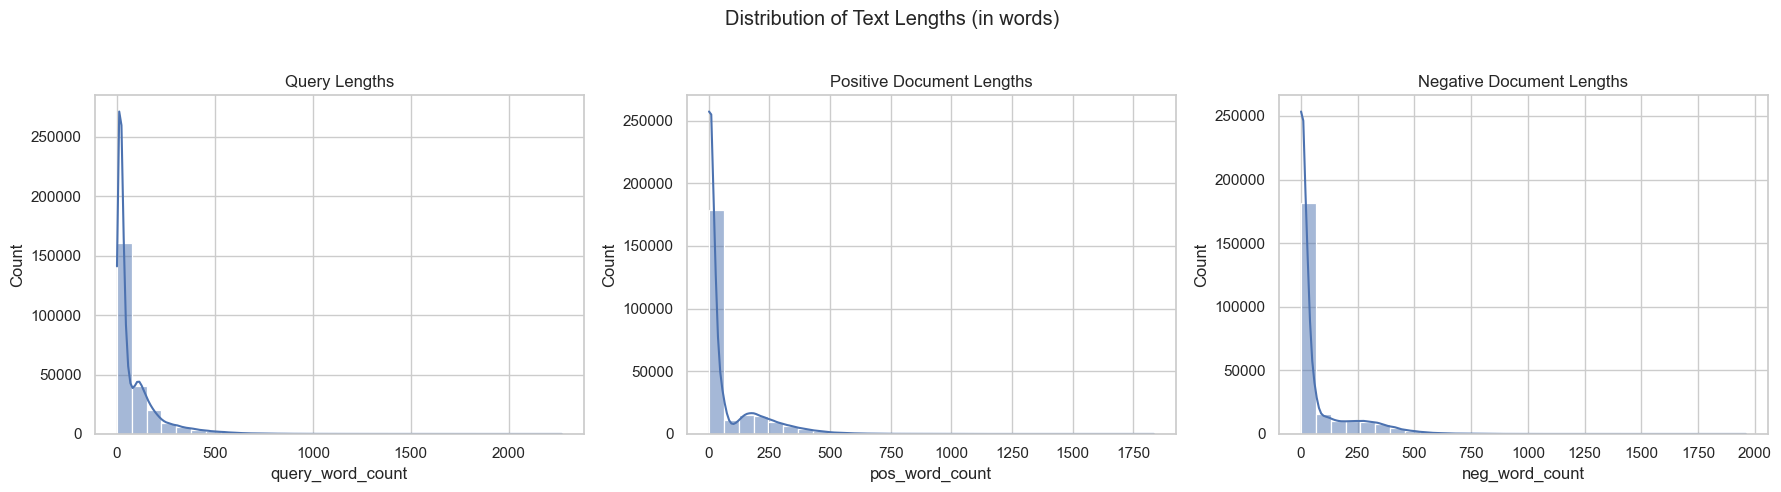

In [50]:
# ----------------------------------------------------------------------
# Robust conversion helpers to cope with NumPy arrays, lists or strings
# ----------------------------------------------------------------------
def seq_to_flat_text(seq):
    """Convert `seq` (str | list | numpy.ndarray | tuple | other) to a flat string."""
    if isinstance(seq, str):
        return seq
    # Convert NumPy arrays to Python lists
    if hasattr(seq, "tolist"):
        seq = seq.tolist()
    if isinstance(seq, (list, tuple)):
        return " ".join(map(str, seq))
    # Fallback – just cast to string
    return str(seq)

def first_doc(docs):
    """Return first document text from a collection (list / ndarray / str)."""
    if docs is None:
        return ""
    if isinstance(docs, str):
        return docs
    if hasattr(docs, "tolist"):
        docs = docs.tolist()
    if isinstance(docs, (list, tuple)) and len(docs) > 0:
        return str(docs[0])
    return ""

# Apply helpers
df = vl_df
df['query_text'] = df['query'].apply(seq_to_flat_text)
df['pos_text']   = df['pos'].apply(first_doc)
df['neg_text']   = df['neg'].apply(first_doc)

# Calculate word counts safely
df['query_word_count'] = df['query_text'].apply(lambda x: len(str(x).split()))
df['pos_word_count']   = df['pos_text'].apply(lambda x: len(str(x).split()))
df['neg_word_count']   = df['neg_text'].apply(lambda x: len(str(x).split()))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Text Lengths (in words)')

sns.histplot(ax=axes[0], data=df, x='query_word_count', bins=30, kde=True)
axes[0].set_title('Query Lengths')

sns.histplot(ax=axes[1], data=df[df['pos_word_count'] > 0], x='pos_word_count', bins=30, kde=True)
axes[1].set_title('Positive Document Lengths')

sns.histplot(ax=axes[2], data=df[df['neg_word_count'] > 0], x='neg_word_count', bins=30, kde=True)
axes[2].set_title('Negative Document Lengths')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 3.2. Common Words Visualization

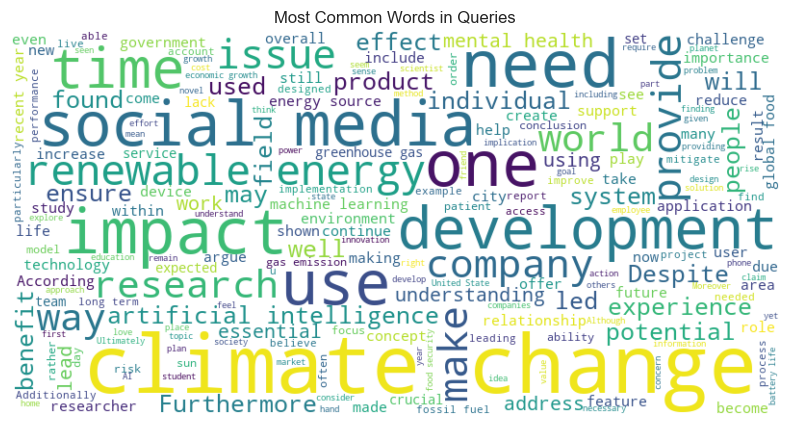

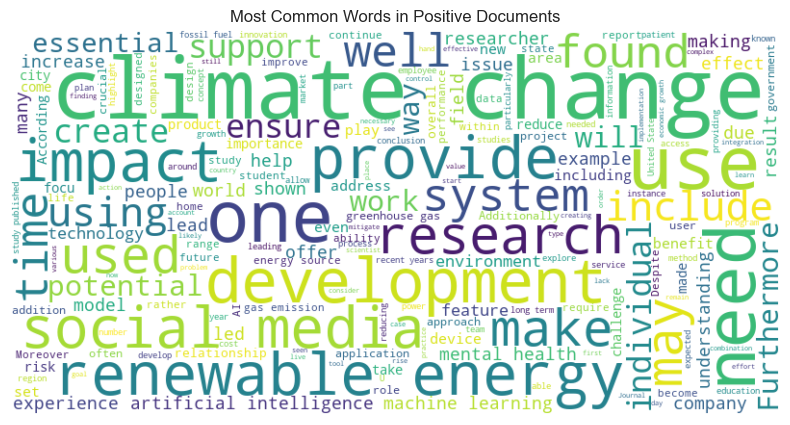

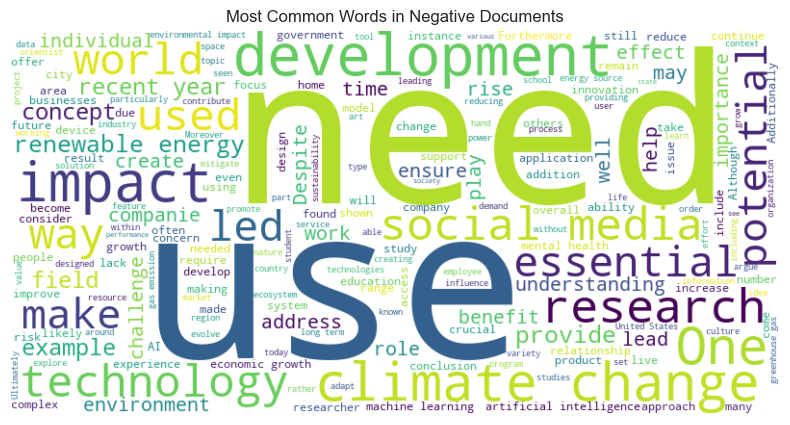

In [51]:
def generate_wordcloud(text, title):
    # Filter out empty strings that might result from empty documents
    if not text.strip():
        print(f"Skipping word cloud for '{title}' as there is no text data.")
        return
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white'
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Combine all texts for each category
query_full_text = ' '.join(df['query_text'])
pos_full_text = ' '.join(df['pos_text'])
neg_full_text = ' '.join(df['neg_text'])

generate_wordcloud(query_full_text, 'Most Common Words in Queries')
generate_wordcloud(pos_full_text, 'Most Common Words in Positive Documents')
generate_wordcloud(neg_full_text, 'Most Common Words in Negative Documents')

## 4. Advanced Exploration with OpenAI

### 4.1. OpenAI API Setup

In [52]:
if 'OPENAI_API_KEY' not in os.environ:
    os.environ['OPENAI_API_KEY'] = getpass('Enter your OpenAI API key: ')


### 4.2. Analyze Reasoning Complexity with an LLM

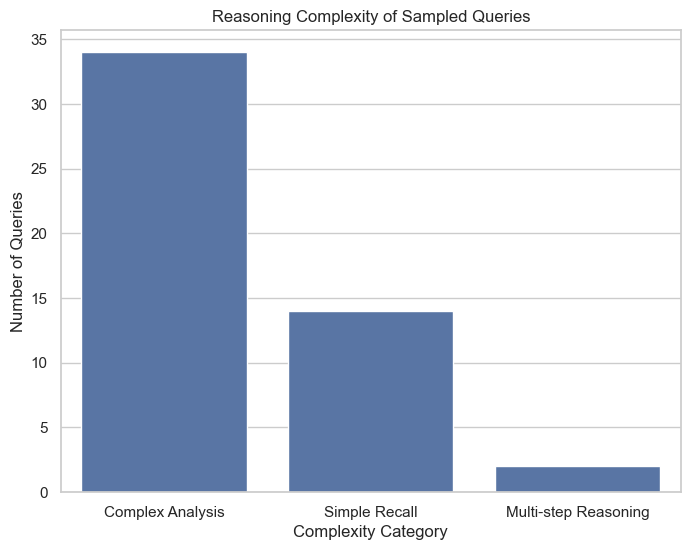

An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


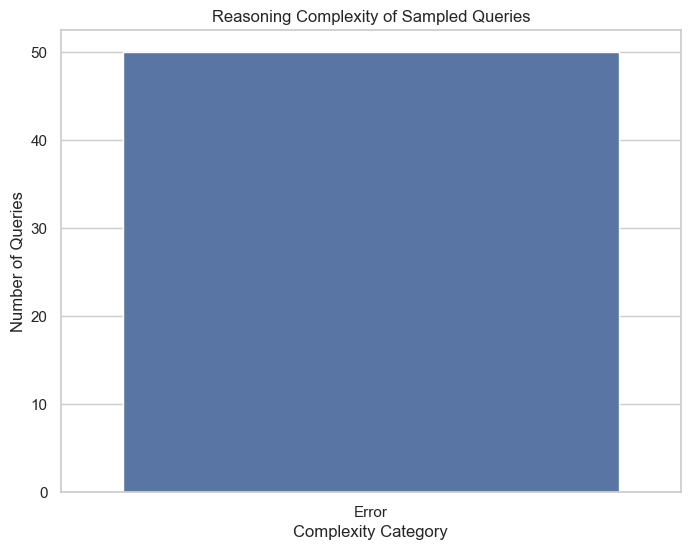

In [53]:
def get_reasoning_complexity(query_text):
    """Uses OpenAI's GPT to classify the reasoning complexity of a query."""
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {
                    "role": "system",
                    "content": "You are a helpful assistant that analyzes the complexity of a reasoning query. Classify the query into one of three categories: 'Simple Recall', 'Multi-step Reasoning', or 'Complex Analysis'. Respond with only the category name."
                },
                {
                    "role": "user",
                    "content": f"Analyze the following query and classify its reasoning complexity: {query_text}"
                }
            ],
            temperature=0
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"An error occurred: {e}")
        return "Error"

# Let's analyze a sample of 50 queries to save time and API costs
sample_df = df.sample(n=50, random_state=42)
sample_df['complexity'] = sample_df['query_text'].apply(get_reasoning_complexity)

# Visualize the results
complexity_counts = sample_df['complexity'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=complexity_counts.index, y=complexity_counts.values)
plt.title('Reasoning Complexity of Sampled Queries')
plt.xlabel('Complexity Category')
plt.ylabel('Number of Queries')
plt.show()

### 4.3. Conceptual Topic Mapping with an LLM

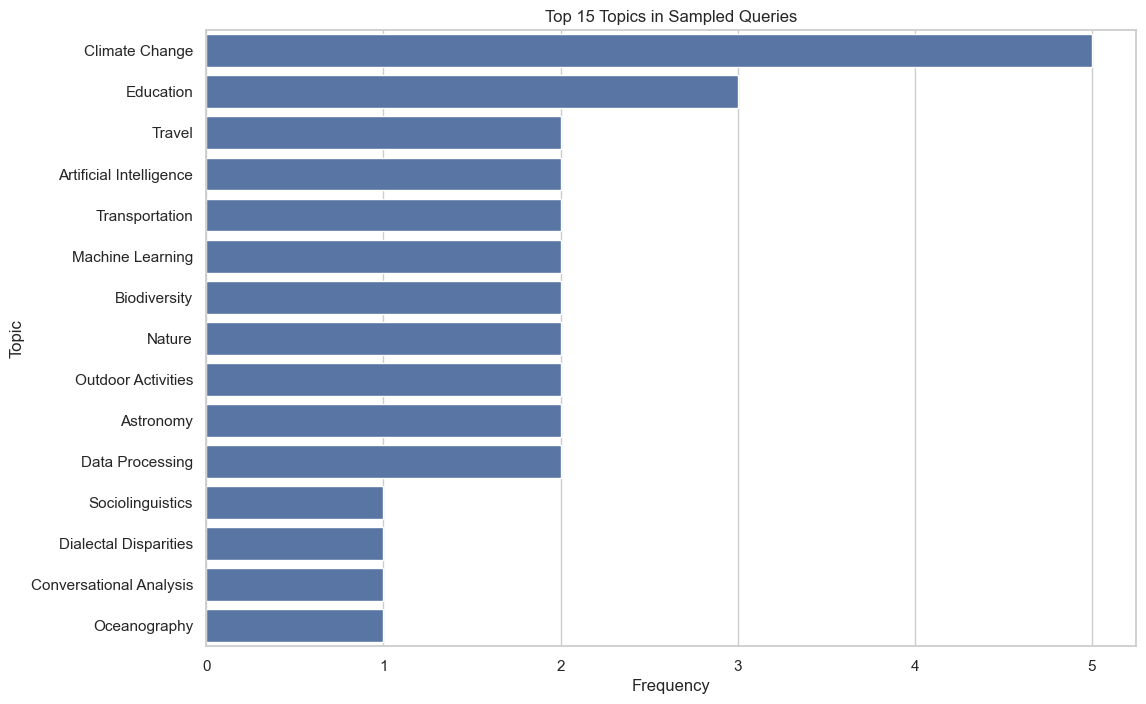

An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


An error occurred: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


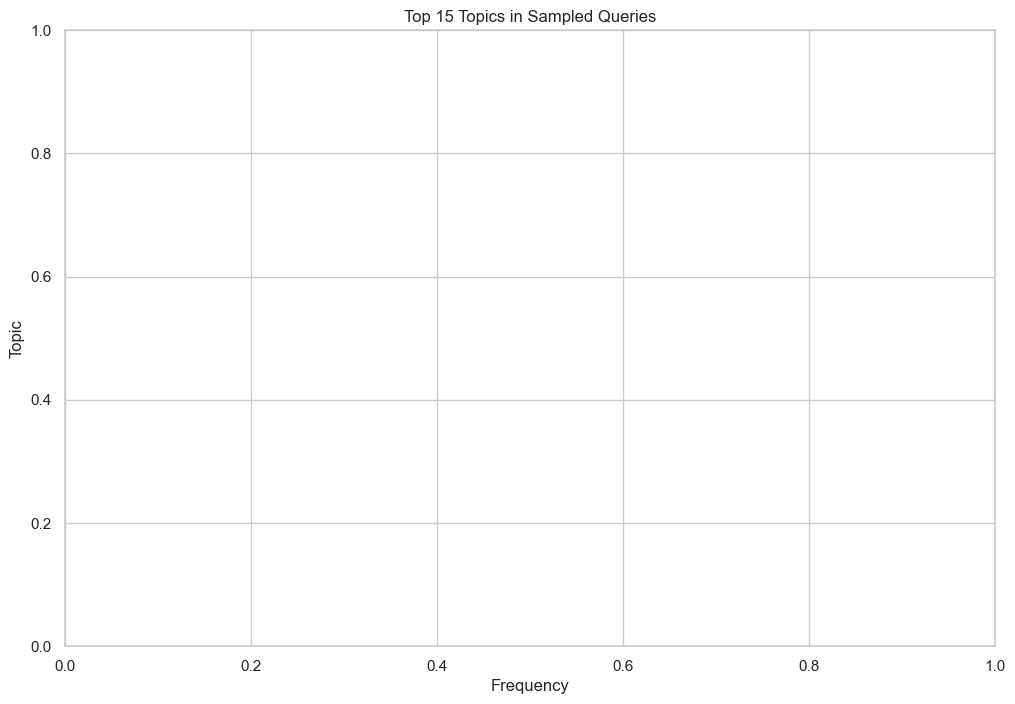

In [54]:
def get_topics(text):
    """Uses OpenAI's GPT to extract topics from a text."""
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {
                    "role": "system",
                    "content": "You are a topic modeling assistant. Extract up to 3 main topics from the following text. Respond with a comma-separated list of topics (e.g., 'Physics, Mathematics, Engineering')."
                },
                {
                    "role": "user",
                    "content": f"Extract topics from this text: {text}"
                }
            ],
            temperature=0
        )
        return [topic.strip() for topic in response.choices[0].message.content.split(',')]
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Use the same sample
sample_df['topics'] = sample_df['query_text'].apply(get_topics)

# Flatten the list of topics and count them
all_topics = [topic for sublist in sample_df['topics'] for topic in sublist if topic]
topic_counts = Counter(all_topics)

most_common_topics = topic_counts.most_common(15)
topics_df = pd.DataFrame(most_common_topics, columns=['Topic', 'Count'])

# Visualize the topic distribution
plt.figure(figsize=(12, 8))
sns.barplot(data=topics_df, x='Count', y='Topic')
plt.title('Top 15 Topics in Sampled Queries')
plt.xlabel('Frequency')
plt.ylabel('Topic')
plt.show()

In [55]:
topics_df

,Topic,Count
0,Climate Change,5
1,Education,3
2,Travel,2
3,Artificial Intelligence,2
4,Transportation,2
5,Machine Learning,2
6,Biodiversity,2
7,Nature,2
8,Outdoor Activities,2
9,Astronomy,2


In [56]:
sample_df['topics'].apply(lambda x: x[0]).unique()

array(['Sociolinguistics', 'Oceanography', 'Wearable technology',
       'Film Analysis', 'Travel', 'Freshwater ecosystems', 'Architecture',
       "Women's Suffrage", 'Brain-Computer Interfaces',
       'Artificial Intelligence', 'Ocean temperatures', 'Smartwatches',
       'Neurolinguistic Programming', 'Vitamin D Supplementation',
       'Summer vacation', 'Food', 'Natural Wonders', 'Nature', 'Camping',
       'Astronomy', 'Absurdism', 'Printing Press', 'Climate Change',
       'Education', 'Cats', 'Decision-making', 'Computer Troubleshooting',
       'Social Media', 'Sugary drinks', 'Glyphosate',
       'Travel Restrictions', 'Distributed Computing', 'Welfare State',
       'Cultural Revolution', 'Head Injury Treatment', 'Cloud Computing',
       'Consumerism', 'Quantum Physics', 'Communication Skills', 'NASA',
       'Ethics', 'Sports', 'Oppressive regimes'], dtype=object)

In [57]:
sample_df[sample_df['topics'].apply(lambda x: 'Fuel efficiency standards' in x)]['query'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0